In [19]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [20]:
df_train = pd.read_csv('..\\data1\\train_rf.csv', sep=',')
df_test =  pd.read_csv('..\\data1\\test_rf.csv', sep=',')

In [21]:
df_train=df_train.drop("Unnamed: 0", axis=1)
df_test=df_test.drop("Unnamed: 0", axis=1)

In [22]:
df_train

,Default_flag_H0_H3,utilized_limit_in_revolving_loans_H0,Default_flag_H0_H6,DPD_term_loan_H0_H3,Os_term_loan_H0_H3,Payments_term_loan_H0_H3,Os_term_loan_H0_H6,Payments_term_loan_H0_H6,Income_H0,Target
0,0,0.39,0,0,-2454.04,3.22,-5697.73,-9.67,9969.16,0
1,0,0.38,0,0,-542.85,6.27,-1287.96,10.03,4220.26,0
2,0,0.47,0,0,-1988.29,-9.08,-4964.15,-2.71,17131.48,0
3,0,0.48,0,-29,-652.78,7.80,-1075.96,1.07,5624.91,0
4,0,0.14,0,0,-1757.73,-560.15,-3466.34,20.29,8742.32,0
...,...,...,...,...,...,...,...,...,...,...
303866,0,0.21,0,0,-527.63,23.22,-1032.90,15.18,3583.84,0
303867,0,0.42,0,0,-1943.47,-5.49,-3887.32,7.87,5650.14,0
303868,0,0.44,0,-9,-936.44,244.46,-1597.35,-19.14,5898.44,0
303869,0,0.40,0,0,-1083.64,12.45,-2162.06,12.20,6127.75,0


<Axes: >

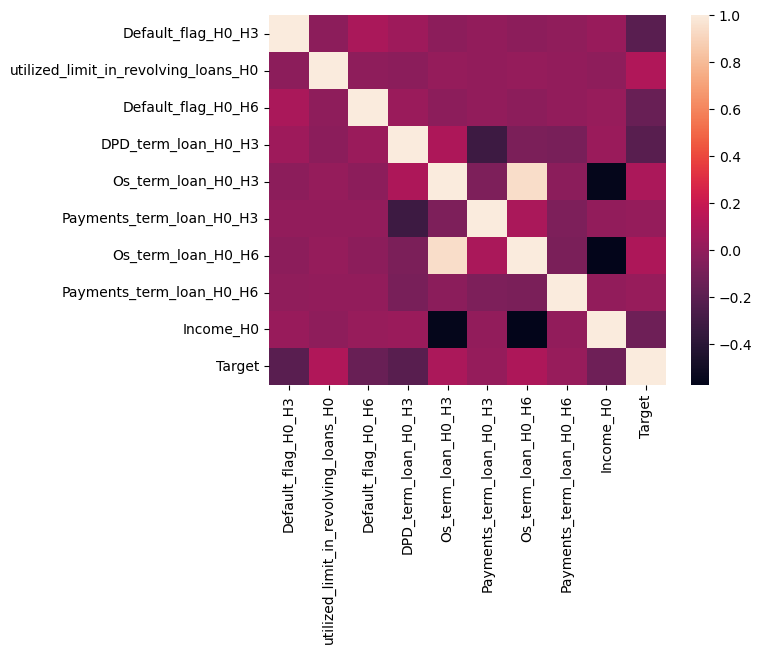

In [23]:
sns.heatmap(df_train.corr())

In [24]:
X_train=df_train.drop('Target', axis=1)
y_train=df_train['Target']
X_test=df_test.drop('Target', axis=1)
y_test=df_test['Target']


In [25]:
print(X_train.shape)  # This should show two dimensions, e.g., (303871, n_features)
print(y_train.shape)  # This should show one dimension, e.g., (303871,)


(303871, 9)
(303871,)


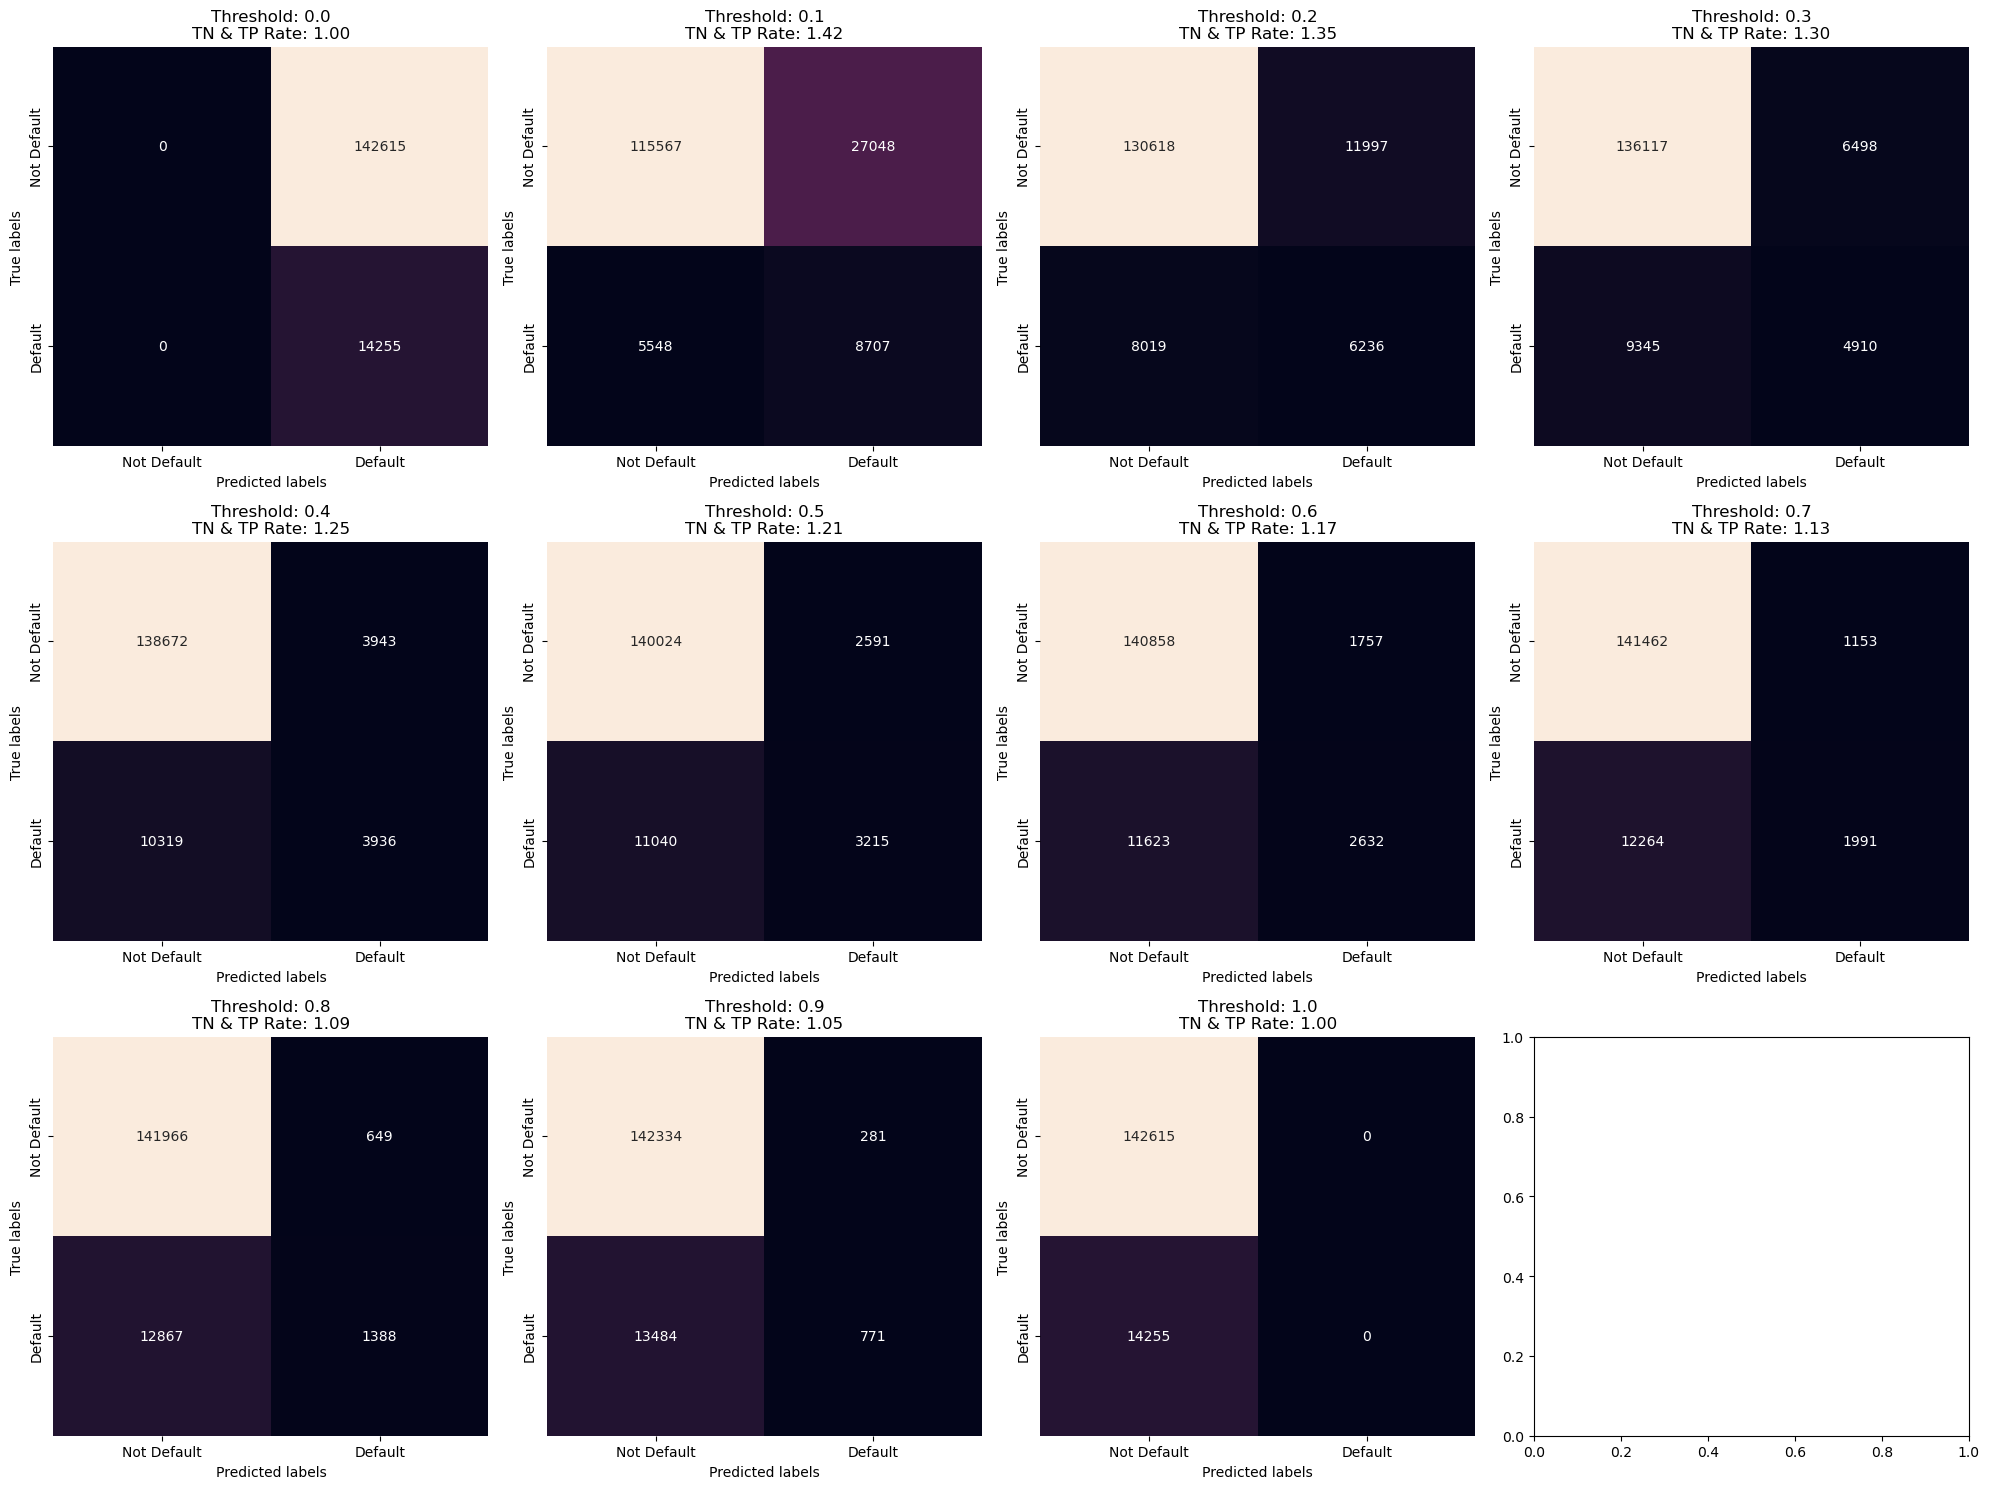

In [26]:
logit_model = LogisticRegression(max_iter=1000)
logit_model.fit(X_train, y_train)
# Prognozowanie prawdopodobieństw przynależności do klasy 1 (Default = 1)
y_pred_proba = logit_model.predict_proba(X_test)[:, 1]

# Określenie progów
thresholds = np.arange(0, 1.1, 0.1)

# Tworzenie wykresów dla macierzy pomyłek przy różnych progach
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))
fig.subplots_adjust(hspace=0.4, wspace=0.4) # Dostosowanie odstępów między wykresami

for thresh, ax in zip(thresholds, axes.flatten()):
    # Konwersja prawdopodobieństw na klasyfikację binarną na podstawie progu
    y_pred_thresh = (y_pred_proba >= thresh).astype(int)
    
    # Obliczanie macierzy pomyłek
    cm = confusion_matrix(y_test, y_pred_thresh)
    
    # Obliczanie odsetków TN i TP
    tn_rate = cm[0, 0] / (cm[0, 0] + cm[0, 1]) if (cm[0, 0] + cm[0, 1]) > 0 else 0
    tp_rate = cm[1, 1] / (cm[1, 0] + cm[1, 1]) if (cm[1, 0] + cm[1, 1]) > 0 else 0
    total_correct_rate = tn_rate + tp_rate
    
    # Tworzenie heatmapy dla macierzy pomyłek
    sns.heatmap(cm, annot=True, fmt="d", cbar=False, ax=ax)
    ax.set_title(f'Threshold: {thresh:.1f}\nTN & TP Rate: {total_correct_rate:.2f}')
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.xaxis.set_ticklabels(['Not Default', 'Default'])
    ax.yaxis.set_ticklabels(['Not Default', 'Default'])

plt.tight_layout()
plt.show()

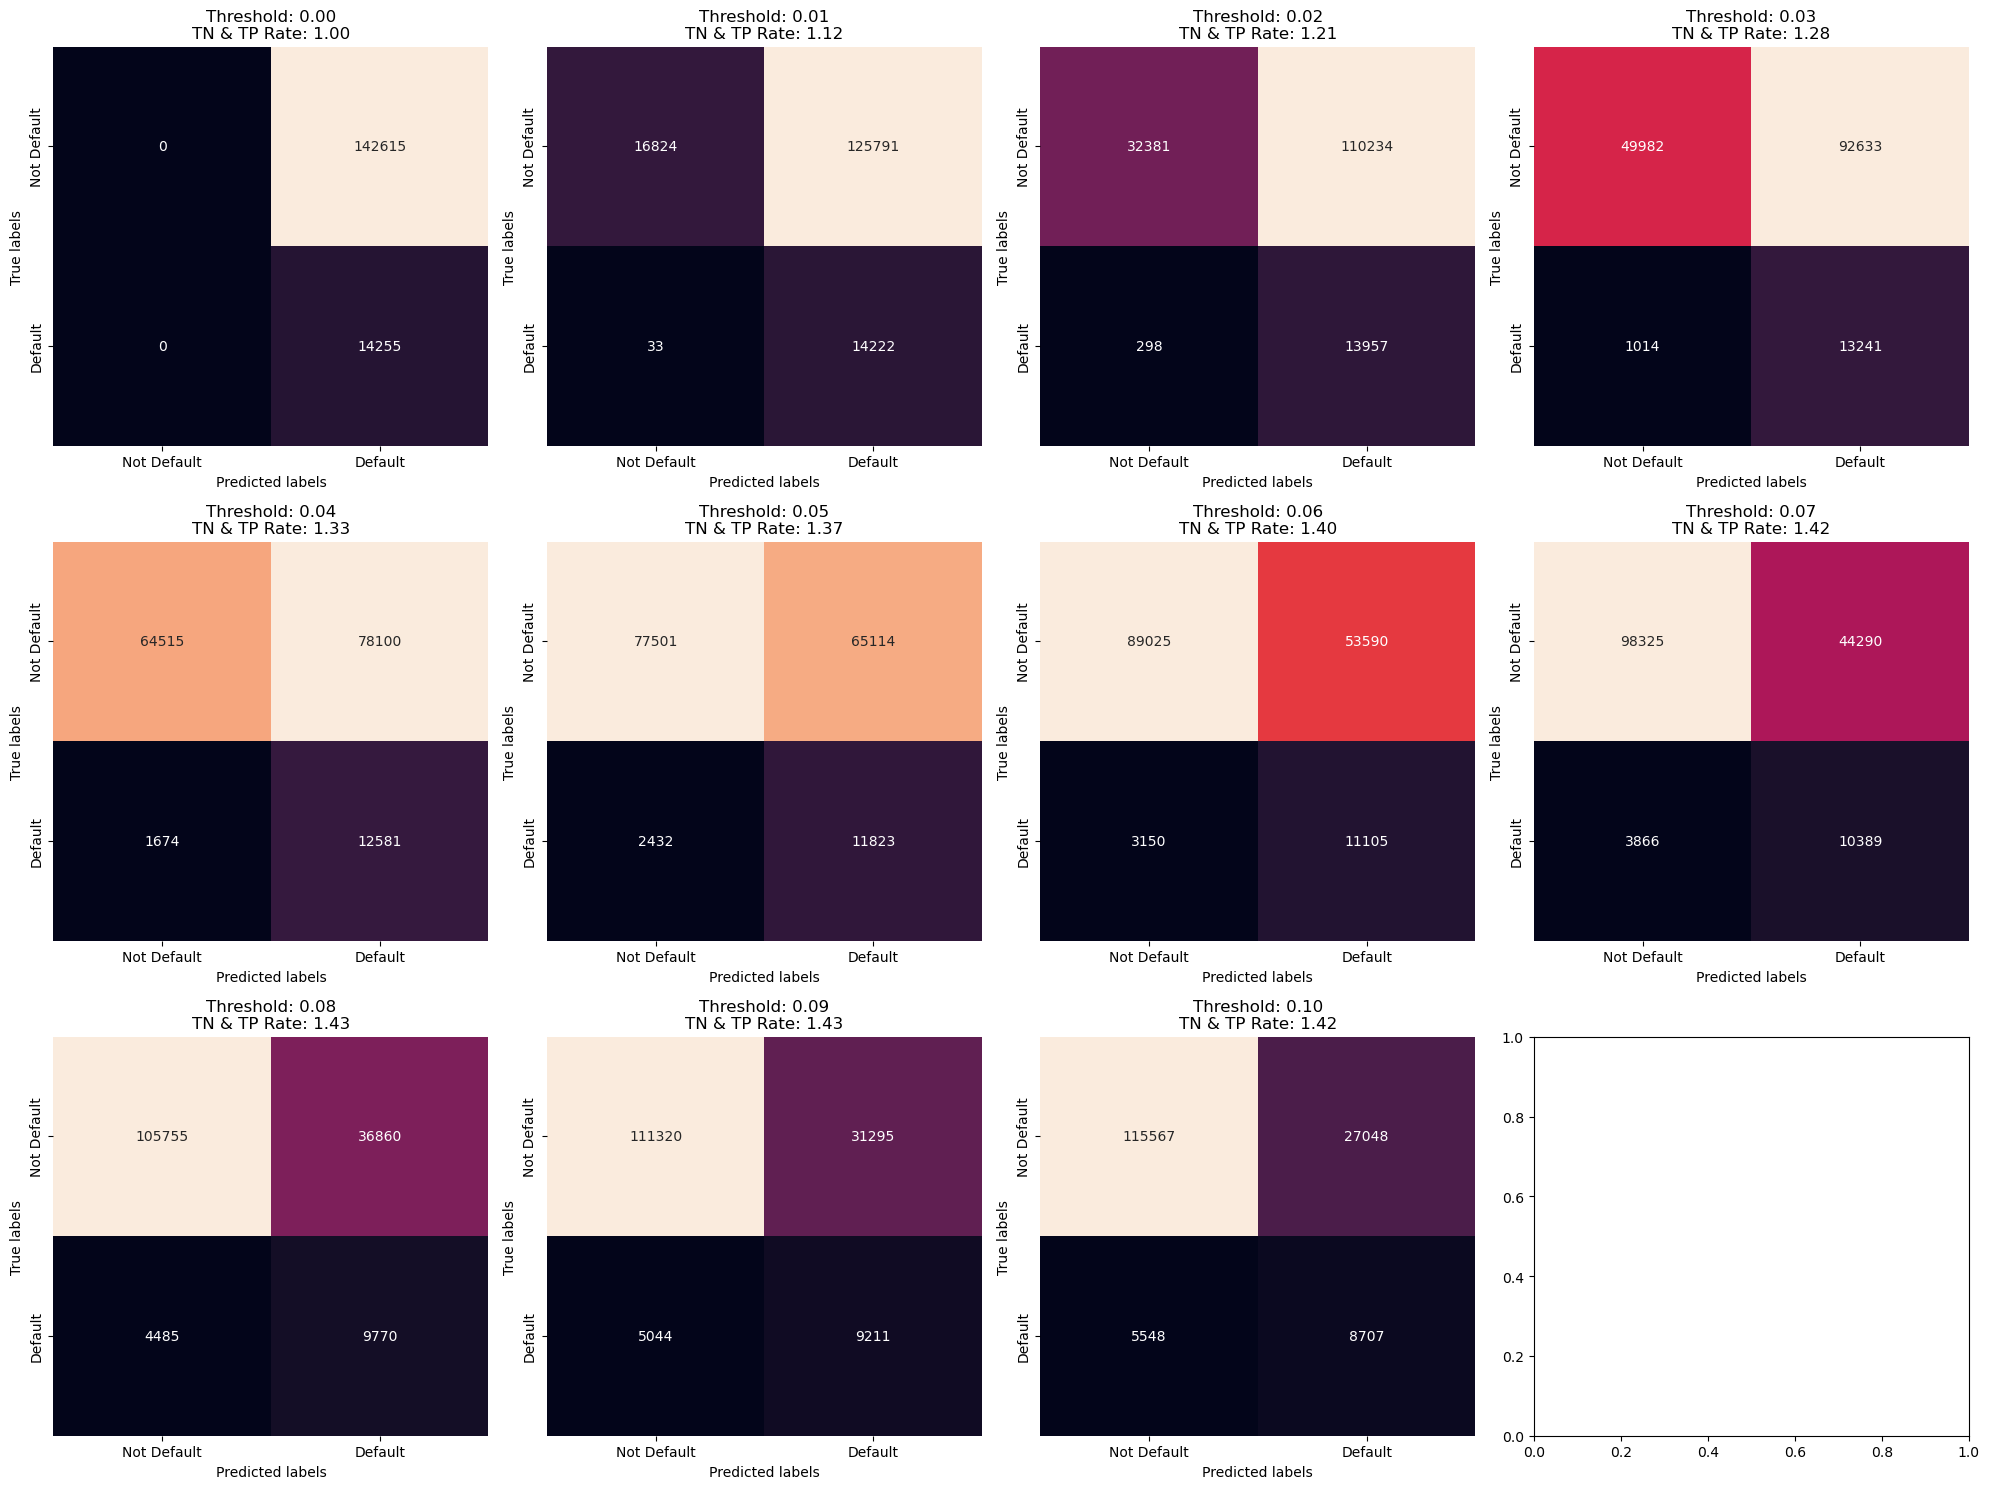

In [27]:
logit_model = LogisticRegression(max_iter=1000)
logit_model.fit(X_train, y_train)
# Prognozowanie prawdopodobieństw przynależności do klasy 1 (Default = 1)
y_pred_proba = logit_model.predict_proba(X_test)[:, 1]

# Określenie progów
thresholds = np.arange(0, 0.11, 0.01)

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))
fig.subplots_adjust(hspace=0.4, wspace=0.4) # Dostosowanie odstępów między wykresami

for thresh, ax in zip(thresholds, axes.flatten()):
    y_pred_thresh = (y_pred_proba >= thresh).astype(int)
    cm = confusion_matrix(y_test, y_pred_thresh)
    
    tn_rate = cm[0, 0] / (cm[0, 0] + cm[0, 1]) if (cm[0, 0] + cm[0, 1]) > 0 else 0
    tp_rate = cm[1, 1] / (cm[1, 0] + cm[1, 1]) if (cm[1, 0] + cm[1, 1]) > 0 else 0
    total_correct_rate = tn_rate + tp_rate
    
    sns.heatmap(cm, annot=True, fmt="d", cbar=False, ax=ax)
    ax.set_title(f'Threshold: {thresh:.2f}\nTN & TP Rate: {total_correct_rate:.2f}')
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.xaxis.set_ticklabels(['Not Default', 'Default'])
    ax.yaxis.set_ticklabels(['Not Default', 'Default'])

plt.tight_layout()
plt.show()


In [28]:
# 0,09 
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, classification_report, make_scorer
import numpy as np

def custom_metric(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1]) if (cm[0, 0] + cm[0, 1]) > 0 else 0
    recall = cm[1, 1] / (cm[1, 0] + cm[1, 1]) if (cm[1, 0] + cm[1, 1]) > 0 else 0
    return specificity + recall

custom_scorer = make_scorer(custom_metric, greater_is_better=True)

# Załóżmy, że X_train, y_train są już zdefiniowane i reprezentują pełny zbiór uczący
# Podział zbioru uczącego na nowe zbiory uczący i walidacyjny
X_train_new, X_val, y_train_new, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Definicja modelu regresji logistycznej z regularyzacją i utworzenie potoku
logit_model = LogisticRegression(max_iter=1000, solver='liblinear')  # solver 'liblinear' obsługuje regularyzację L1
pipe = Pipeline([
    ('feature_selection', RFE(estimator=logit_model)),
    ('classification', logit_model)
])

# Definicja przestrzeni hiperparametrów
param_grid = {
    'feature_selection__n_features_to_select': [3, 6, 9],  # Liczba cech do selekcji
    'classification__C': [0.01, 0.1, 1, 10, 100],  # Siła regularyzacji
    'classification__penalty': ['l1', 'l2']  # Rodzaj regularyzacji
}

# Przeszukiwanie siatki z walidacją krzyżową
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring=custom_scorer)
grid_search.fit(X_train_new, y_train_new)

# Wyświetlenie najlepszych hiperparametrów
print("Najlepsze hiperparametry:", grid_search.best_params_)
print("Najlepsza dokładność:", grid_search.best_score_)

# Użycie najlepszego modelu do prognozowania prawdopodobieństw na zbiorze testowym
best_model = grid_search.best_estimator_
y_pred_proba_best = best_model.predict_proba(X_test)[:, 1]

# Próg decyzyjny
threshold = 0.09

# Konwersja prawdopodobieństw na klasyfikację binarną na podstawie progu
y_pred_best_threshold = (y_pred_proba_best >= threshold).astype(int)

# Obliczenie i wyświetlenie macierzy pomyłek dla najlepszego modelu z progiem 0.4
cm_best_threshold = confusion_matrix(y_test, y_pred_best_threshold)
print("Confusion Matrix dla najlepszego modelu z progiem 0.09:")
print(cm_best_threshold)

# Wyświetlenie pełnego raportu klasyfikacji dla najlepszego modelu z progiem 0.4
print("\nClassification Report dla najlepszego modelu z progiem 0.09:")
print(classification_report(y_test, y_pred_best_threshold))

Najlepsze hiperparametry: {'classification__C': 100, 'classification__penalty': 'l1', 'feature_selection__n_features_to_select': 9}
Najlepsza dokładność: 1.1450465066420867
Confusion Matrix dla najlepszego modelu z progiem 0.4:
[[111418  31197]
 [  5055   9200]]

Classification Report dla najlepszego modelu z progiem 0.4:
              precision    recall  f1-score   support

           0       0.96      0.78      0.86    142615
           1       0.23      0.65      0.34     14255

    accuracy                           0.77    156870
   macro avg       0.59      0.71      0.60    156870
weighted avg       0.89      0.77      0.81    156870



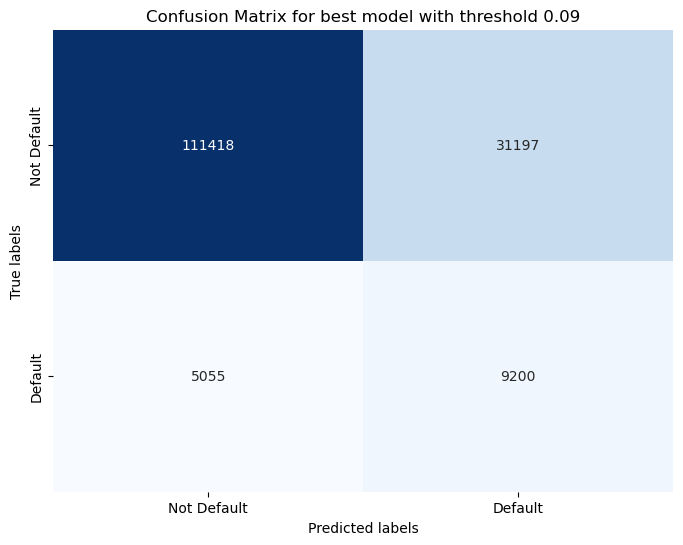

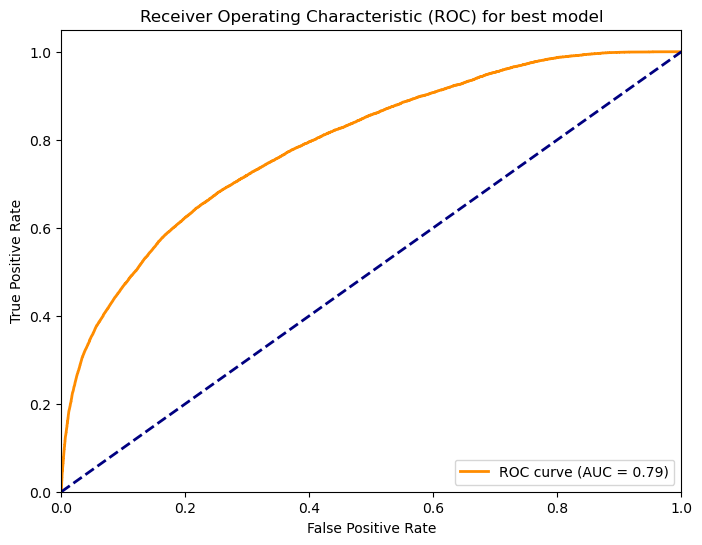

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import seaborn as sns

# Wizualizacja macierzy pomyłek
plt.figure(figsize=(8, 6))
sns.heatmap(cm_best_threshold, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for best model with threshold 0.09")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([0.5, 1.5], ["Not Default", "Default"])
plt.yticks([0.5, 1.5], ["Not Default", "Default"], va="center")
plt.show()

# Obliczanie krzywej ROC i AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_best)
roc_auc = auc(fpr, tpr)

# Wizualizacja krzywej ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for best model')
plt.legend(loc="lower right")
plt.show()